In [2]:
!pip install ydata-profiling
import ydata_profiling

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df_raw = pd.read_csv("train_dataset_full.csv")
df = df_raw.copy()

In [4]:
df_raw
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389163 entries, 0 to 389162
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   session_id              384997 non-null  float64
 1   DateTime                385054 non-null  object 
 2   user_id                 385055 non-null  float64
 3   product                 384989 non-null  object 
 4   campaign_id             384975 non-null  float64
 5   webpage_id              385006 non-null  float64
 6   product_category_1      384962 non-null  float64
 7   product_category_2      80928 non-null   float64
 8   user_group_id           369844 non-null  float64
 9   gender                  369839 non-null  object 
 10  age_level               369854 non-null  float64
 11  user_depth              369841 non-null  float64
 12  city_development_index  281026 non-null  float64
 13  var_1                   385002 non-null  float64
 14  is_click            

In [5]:
df = df.rename(columns={'is_click': 'ctr'})

# Convert specified columns to categorical data type
categorical_cols = ['product', 'campaign_id', 'webpage_id', 'product_category_1', 'product_category_2', 'gender']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389163 entries, 0 to 389162
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   session_id              384997 non-null  float64 
 1   DateTime                385054 non-null  object  
 2   user_id                 385055 non-null  float64 
 3   product                 384989 non-null  category
 4   campaign_id             384975 non-null  category
 5   webpage_id              385006 non-null  category
 6   product_category_1      384962 non-null  category
 7   product_category_2      80928 non-null   category
 8   user_group_id           369844 non-null  float64 
 9   gender                  369839 non-null  category
 10  age_level               369854 non-null  float64 
 11  user_depth              369841 non-null  float64 
 12  city_development_index  281026 non-null  float64 
 13  var_1                   385002 non-null  float64 
 14  ctr 

In [6]:
ydata_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
overall_mean_ctr = df['ctr'].mean()
df_session_id_na = df[df['session_id'].isna()]
session_id_na_mean_ctr = df_session_id_na['ctr'].mean()
print(f"Overall Mean CTR: {overall_mean_ctr:.5f}")
print(f"Session ID N/A CTR: {session_id_na_mean_ctr:.5f}")
print("There is barely any difference")

# 1. Find % of rows where session_id is NaN
percent_session_id_na = (df['session_id'].isna().sum() / len(df)) * 100
print(f"Percentage of rows where session_id is NaN: {percent_session_id_na:.2f}%")

# 2. For each column of df_session_id_na, print % of rows where the col is NaN
for col in df_session_id_na.columns:
    percent_na = (df_session_id_na[col].isna().sum() / len(df_session_id_na)) * 100
    print(f"Percentage of NaN values in column '{col}': {percent_na:.2f}%")

Overall Mean CTR: 0.06758
Session ID N/A CTR: 0.06732
There is barely any difference
Percentage of rows where session_id is NaN: 1.07%
Percentage of NaN values in column 'session_id': 100.00%
Percentage of NaN values in column 'DateTime': 67.04%
Percentage of NaN values in column 'user_id': 66.42%
Percentage of NaN values in column 'product': 67.76%
Percentage of NaN values in column 'campaign_id': 67.07%
Percentage of NaN values in column 'webpage_id': 66.54%
Percentage of NaN values in column 'product_category_1': 68.05%
Percentage of NaN values in column 'product_category_2': 92.97%
Percentage of NaN values in column 'user_group_id': 67.93%
Percentage of NaN values in column 'gender': 68.51%
Percentage of NaN values in column 'age_level': 68.84%
Percentage of NaN values in column 'user_depth': 67.86%
Percentage of NaN values in column 'city_development_index': 75.95%
Percentage of NaN values in column 'var_1': 67.19%
Percentage of NaN values in column 'ctr': 65.77%


1. The Mean CTR for entries with session I/D NA is very similar to the overall mean CTR.
2. Session ID missing accounts for 1% of the data
3. For entries with missing Session ID, all other entries are likely than not to be missing as well
4. Likely MCAR, given absence of all other data it is difficult to formulate any hypothesis
5. Given all this and the fact that Mean CTR is approximately the same -- safe to ignore

In [8]:
df = df.dropna(subset=['session_id'])

In [9]:
for col in df.columns:
    percent_na = (df[col].isna().sum() / len(df)) * 100
    print(f"Percentage of NaN values in column '{col}': {percent_na:.2f}%")

Percentage of NaN values in column 'session_id': 0.00%
Percentage of NaN values in column 'DateTime': 0.34%
Percentage of NaN values in column 'user_id': 0.35%
Percentage of NaN values in column 'product': 0.35%
Percentage of NaN values in column 'campaign_id': 0.36%
Percentage of NaN values in column 'webpage_id': 0.36%
Percentage of NaN values in column 'product_category_1': 0.35%
Percentage of NaN values in column 'product_category_2': 79.06%
Percentage of NaN values in column 'user_group_id': 4.28%
Percentage of NaN values in column 'gender': 4.28%
Percentage of NaN values in column 'age_level': 4.27%
Percentage of NaN values in column 'user_depth': 4.28%
Percentage of NaN values in column 'city_development_index': 27.27%
Percentage of NaN values in column 'var_1': 0.35%
Percentage of NaN values in column 'ctr': 0.36%


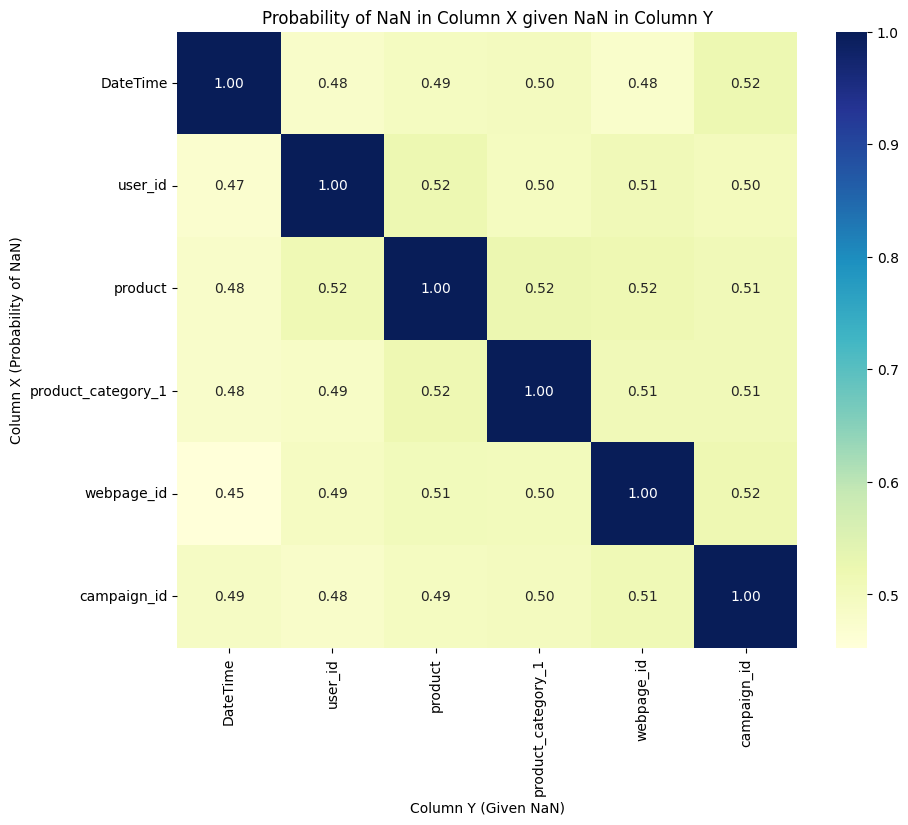

Mean CTR when one of specified columns is NA: 0.06756


In [10]:
import seaborn as sns
cols = ['DateTime', 'user_id', 'product', 'product_category_1', 'webpage_id',
        'campaign_id']

# Create an empty matrix to store the probabilities
nan_probability_matrix = [[0.0 for _ in cols] for _ in cols]

# Calculate the probability matrix
for i, col1 in enumerate(cols):
    for j, col2 in enumerate(cols):
        col1_nan_and_col2_nan_count = len(df[(df[col1].isna()) & (df[col2].isna())])
        col1_nan_count = len(df[df[col1].isna()])
        nan_probability_matrix[i][j] = col1_nan_and_col2_nan_count / col1_nan_count


# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(nan_probability_matrix, annot=True, fmt=".2f", cmap="YlGnBu",
            xticklabels=cols, yticklabels=cols)
plt.title('Probability of NaN in Column X given NaN in Column Y')
plt.xlabel('Column Y (Given NaN)')
plt.ylabel('Column X (Probability of NaN)')
plt.show()

df_na = df.dropna(subset=cols)
print(f"Mean CTR when one of specified columns is NA: {df_na['ctr'].mean():.5f}")

1. For each of these columns, missing data implies that data in the other columns is missing as well, so most likely impossible to prove or formulate any hypothesis
2. These entries account for less than 1% of the data
3. Mean CTR is the approximately the same
4. Verdict -- likely MCAR and safe to ignore

In [11]:
df = df.dropna(subset=['DateTime', 'user_id', 'product', 'product_category_1', 'webpage_id',
                       'campaign_id'])

In [12]:
for col in df.columns:
    percent_na = (df[col].isna().sum() / len(df)) * 100
    print(f"Percentage of NaN values in column '{col}': {percent_na:.2f}%")

Percentage of NaN values in column 'session_id': 0.00%
Percentage of NaN values in column 'DateTime': 0.00%
Percentage of NaN values in column 'user_id': 0.00%
Percentage of NaN values in column 'product': 0.00%
Percentage of NaN values in column 'campaign_id': 0.00%
Percentage of NaN values in column 'webpage_id': 0.00%
Percentage of NaN values in column 'product_category_1': 0.00%
Percentage of NaN values in column 'product_category_2': 78.98%
Percentage of NaN values in column 'user_group_id': 3.96%
Percentage of NaN values in column 'gender': 3.97%
Percentage of NaN values in column 'age_level': 3.97%
Percentage of NaN values in column 'user_depth': 3.97%
Percentage of NaN values in column 'city_development_index': 27.03%
Percentage of NaN values in column 'var_1': 0.03%
Percentage of NaN values in column 'ctr': 0.03%


Again seems MCAR (no correlation with time, webpage_id, campaign_id or product). Mean CTR is the same. Again, safe to ignore.

In [13]:
for col in ['gender', 'age_level', 'user_depth', 'city_development_index']:
  col_mapping = df.groupby('user_id')[col].first()
  df[col] = df.apply(lambda row: col_mapping[row['user_id']] if pd.isna(row[col]) else row[col], axis=1)

In [14]:
for col in df.columns:
    percent_na = (df[col].isna().sum() / len(df)) * 100
    print(f"Percentage of NaN values in column '{col}': {percent_na:.2f}%")

Percentage of NaN values in column 'session_id': 0.00%
Percentage of NaN values in column 'DateTime': 0.00%
Percentage of NaN values in column 'user_id': 0.00%
Percentage of NaN values in column 'product': 0.00%
Percentage of NaN values in column 'campaign_id': 0.00%
Percentage of NaN values in column 'webpage_id': 0.00%
Percentage of NaN values in column 'product_category_1': 0.00%
Percentage of NaN values in column 'product_category_2': 78.98%
Percentage of NaN values in column 'user_group_id': 3.96%
Percentage of NaN values in column 'gender': 3.94%
Percentage of NaN values in column 'age_level': 3.94%
Percentage of NaN values in column 'user_depth': 3.94%
Percentage of NaN values in column 'city_development_index': 27.01%
Percentage of NaN values in column 'var_1': 0.03%
Percentage of NaN values in column 'ctr': 0.03%


In [15]:
df

session_id          DateTime    user_id product campaign_id  \
0          98528.0  2017-07-04 16:42     7716.0       C    405490.0   
1         589714.0  2017-07-07 07:40  1035283.0       I    118601.0   
2         478652.0  2017-07-07 20:42    65994.0       H    359520.0   
3          34536.0  2017-07-05 15:05    75976.0       H    405490.0   
4          71863.0  2017-07-06 20:11   987498.0       C    405490.0   
...            ...               ...        ...     ...         ...   
389158    464382.0  2017-07-02 08:03   927351.0       I    359520.0   
389159    446419.0  2017-07-04 21:14   698480.0       H    360936.0   
389160    218568.0  2017-07-06 23:30   165101.0       I    118601.0   
389161    258090.0  2017-07-02 16:35     2179.0       I    396664.0   
389162    346235.0  2017-07-03 20:57   744441.0       H    414149.0   

       webpage_id product_category_1 product_category_2  user_group_id  \
0         60305.0                3.0                NaN            3.0   
1         28529.0                4.0            82527.0           10.0   
2         13787.0                4.0                NaN            4.0   
3         60305.0                3.0                NaN            3.0   
4         60305.0                3.0                NaN            2.0   
...           ...                ...                ...            ...   
389158    13787.0                3.0                NaN            2.0   
389159    13787.0                3.0                NaN            3.0   
389160    28529.0                4.0            82527.0            2.0   
389161    51181.0                1.0                NaN            2.0   
389162    45962.0                5.0                NaN            3.0   

        gender  age_level  user_depth  city_development_index  var_1  ctr  
0         Male        3.0         3.0                     NaN    1.0  1.0  
1       Female        4.0         3.0                     3.0    1.0  0.0  
2         Male        4.0         3.0                     2.0    0.0  0.0  
3         Male        3.0         3.0                     3.0    0.0  0.0  
4         Male        2.0         3.0                     2.0    0.0  0.0  
...        ...        ...         ...                     ...    ...  ...  
389158    Male        2.0         3.0                     NaN    1.0  0.0  
389159    Male        3.0         3.0                     1.0    1.0  0.0  
389160    Male        2.0         3.0                     NaN    1.0  0.0  
389161    Male        2.0         3.0                     4.0    0.0  0.0  
389162    Male        3.0         3.0                     4.0    0.0  1.0  

[381898 rows x 15 columns]

In [16]:
for col in df.columns:
    percent_na = (df[col].isna().sum() / len(df)) * 100
    print(f"Percentage of NaN values in column '{col}': {percent_na:.2f}%")

Percentage of NaN values in column 'session_id': 0.00%
Percentage of NaN values in column 'DateTime': 0.00%
Percentage of NaN values in column 'user_id': 0.00%
Percentage of NaN values in column 'product': 0.00%
Percentage of NaN values in column 'campaign_id': 0.00%
Percentage of NaN values in column 'webpage_id': 0.00%
Percentage of NaN values in column 'product_category_1': 0.00%
Percentage of NaN values in column 'product_category_2': 78.98%
Percentage of NaN values in column 'user_group_id': 3.96%
Percentage of NaN values in column 'gender': 3.94%
Percentage of NaN values in column 'age_level': 3.94%
Percentage of NaN values in column 'user_depth': 3.94%
Percentage of NaN values in column 'city_development_index': 27.01%
Percentage of NaN values in column 'var_1': 0.03%
Percentage of NaN values in column 'ctr': 0.03%


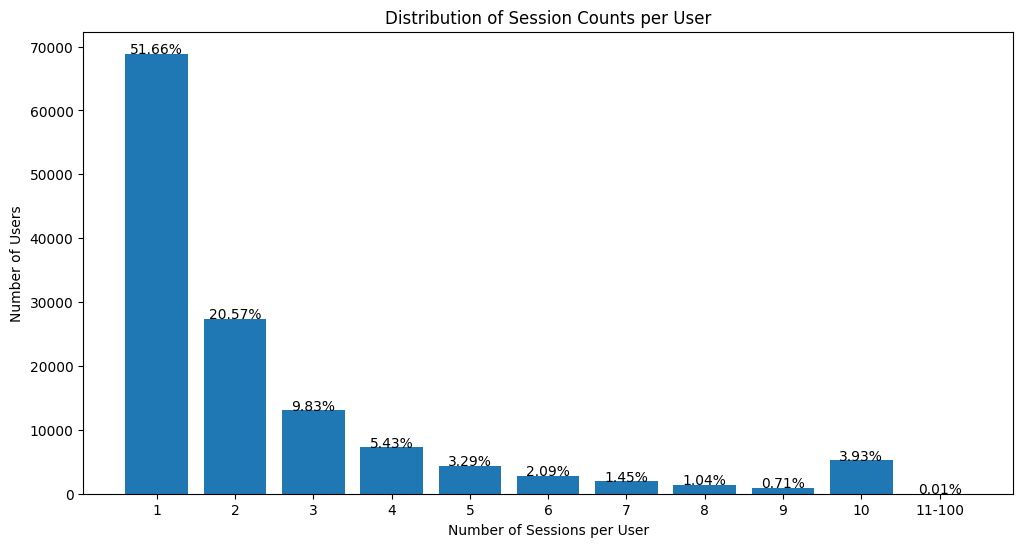

In [17]:
session_counts = df.groupby('user_id')['session_id'].nunique()

# Create bins for session counts
bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100, float('inf')]
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11-100']
session_counts_binned = pd.cut(session_counts, bins=bins, labels=labels, right=False)

# Count the number of users in each bin
session_counts_distribution = session_counts_binned.value_counts(sort=False)

# Calculate the percentage of users in each bin
session_counts_percentage = (session_counts_distribution / session_counts_distribution.sum()) * 100


# Create the plot
plt.figure(figsize=(12, 6))
plt.bar(session_counts_distribution.index, session_counts_distribution.values)
plt.xlabel('Number of Sessions per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Session Counts per User')

# Add percentage labels above the bars
for i, v in enumerate(session_counts_distribution.values):
    plt.text(i, v + 10, f'{session_counts_percentage.iloc[i]:.2f}%', ha='center')  # Adjust vertical offset as needed

plt.show()

Remove all users with > 10 sessions -- they are outliers (bots or obsessive users) that possibly skew the data

In [18]:
session_counts = df.groupby('user_id')['session_id'].nunique()

# Identify users with more than 10 sessions
users_to_remove = session_counts[session_counts > 10].index

# Remove rows corresponding to those users
df = df[~df['user_id'].isin(users_to_remove)]

In [19]:
def analyze_age_level_zero(df, column_name):
  """Counts entries where age_level is 0.0 for each unique value in the specified column."""
  for value in df[column_name].unique():
    subset = df[df[column_name] == value]
    count_age_level_zero = len(subset[subset['age_level'] == 0.0])
    print(f"For {column_name} = {value}: {count_age_level_zero} entries have age_level = 0.0")


# Analyze for 'webpage_id'
analyze_age_level_zero(df, 'webpage_id')

# Analyze for 'product'
analyze_age_level_zero(df, 'product')

For webpage_id = 60305.0: 31 entries have age_level = 0.0
For webpage_id = 28529.0: 4 entries have age_level = 0.0
For webpage_id = 51181.0: 14 entries have age_level = 0.0
For webpage_id = 11085.0: 0 entries have age_level = 0.0
For webpage_id = 13787.0: 6 entries have age_level = 0.0
For webpage_id = 6970.0: 4 entries have age_level = 0.0
For webpage_id = 1734.0: 12 entries have age_level = 0.0
For webpage_id = 53587.0: 13 entries have age_level = 0.0
For webpage_id = 45962.0: 0 entries have age_level = 0.0
For product = C: 33 entries have age_level = 0.0
For product = I: 17 entries have age_level = 0.0
For product = H: 4 entries have age_level = 0.0
For product = D: 3 entries have age_level = 0.0
For product = G: 4 entries have age_level = 0.0
For product = E: 3 entries have age_level = 0.0
For product = F: 5 entries have age_level = 0.0
For product = J: 10 entries have age_level = 0.0
For product = A: 5 entries have age_level = 0.0
For product = B: 0 entries have age_level = 0.0


Age_level 0.0 looks more like an error or missing age as opposed to a genuine category. Few examples, not specifically correlated with product or webpage -- safe to ignore

In [20]:
df = df[df['age_level'] != 0.0]

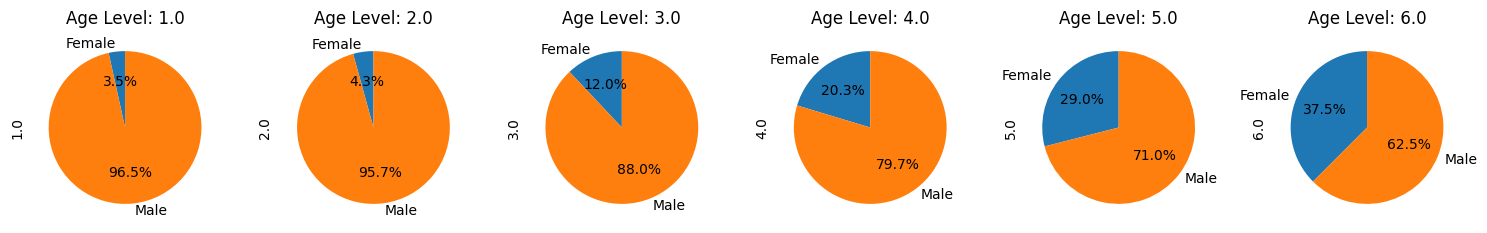

In [21]:
age_gender_counts = df.groupby(['age_level', 'gender']).size().unstack()

# Create the subplots
fig, axes = plt.subplots(nrows=1, ncols=len(age_gender_counts.index), figsize=(15, 5))  # Adjust figsize as needed

# Iterate over age levels and create pie charts
for i, age_level in enumerate(age_gender_counts.index):
    ax = axes[i]
    age_gender_counts.loc[age_level].plot.pie(autopct='%1.1f%%', ax=ax, startangle=90)
    ax.set_title(f"Age Level: {age_level}")

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

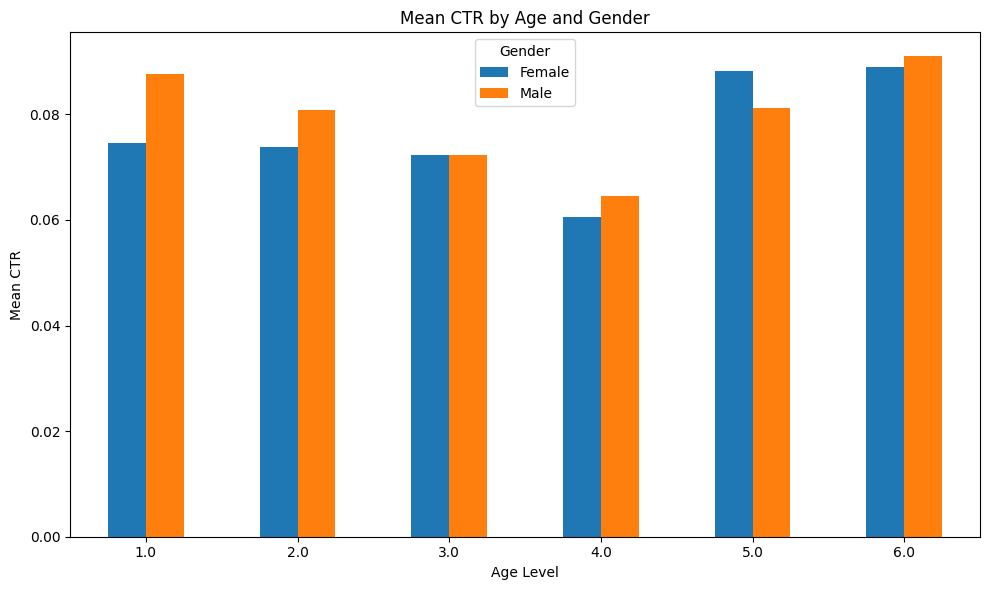

In [22]:
mean_ctr_by_age_gender = df.groupby(['age_level', 'gender'])['ctr'].mean().unstack()

mean_ctr_by_age_gender.plot(kind='bar', figsize=(10, 6))
plt.title('Mean CTR by Age and Gender')
plt.xlabel('Age Level')
plt.ylabel('Mean CTR')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

No significant correlation between CTR and Gender even when controlling by age.

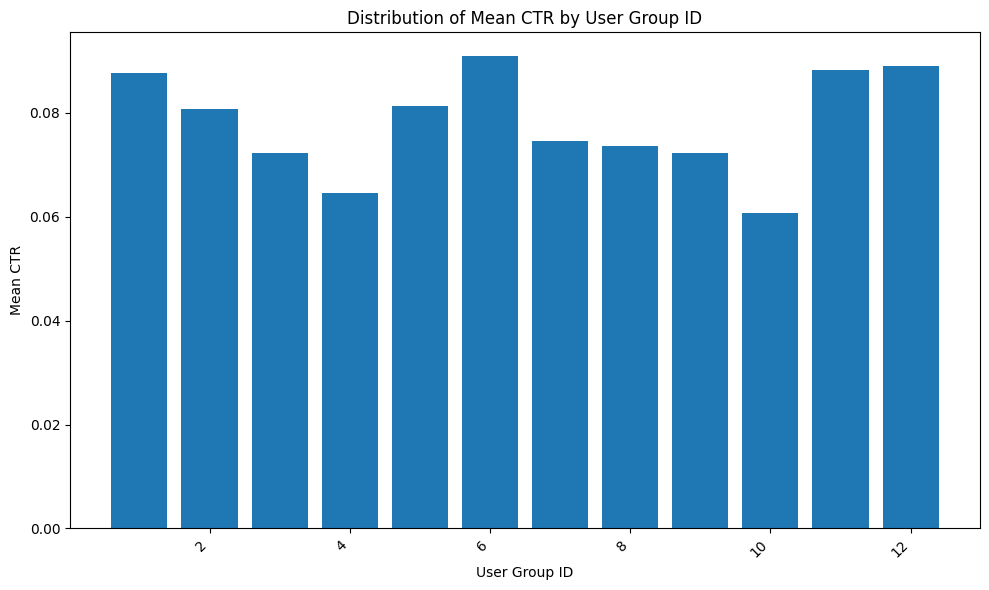

In [23]:

mean_ctr_by_group = df.groupby('user_group_id')['ctr'].mean()

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(mean_ctr_by_group.index, mean_ctr_by_group.values)
plt.xlabel('User Group ID')
plt.ylabel('Mean CTR')
plt.title('Distribution of Mean CTR by User Group ID')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

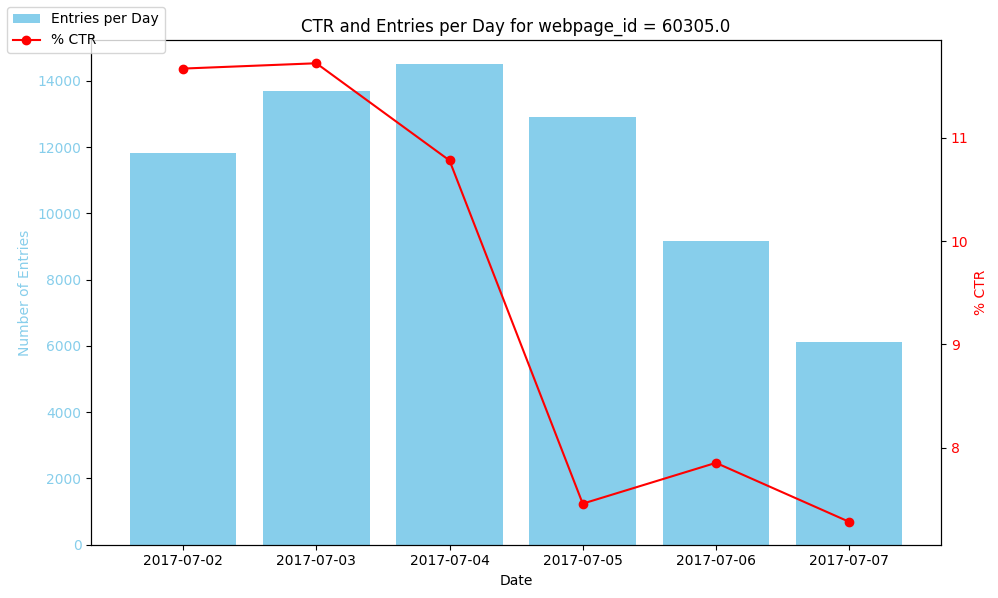

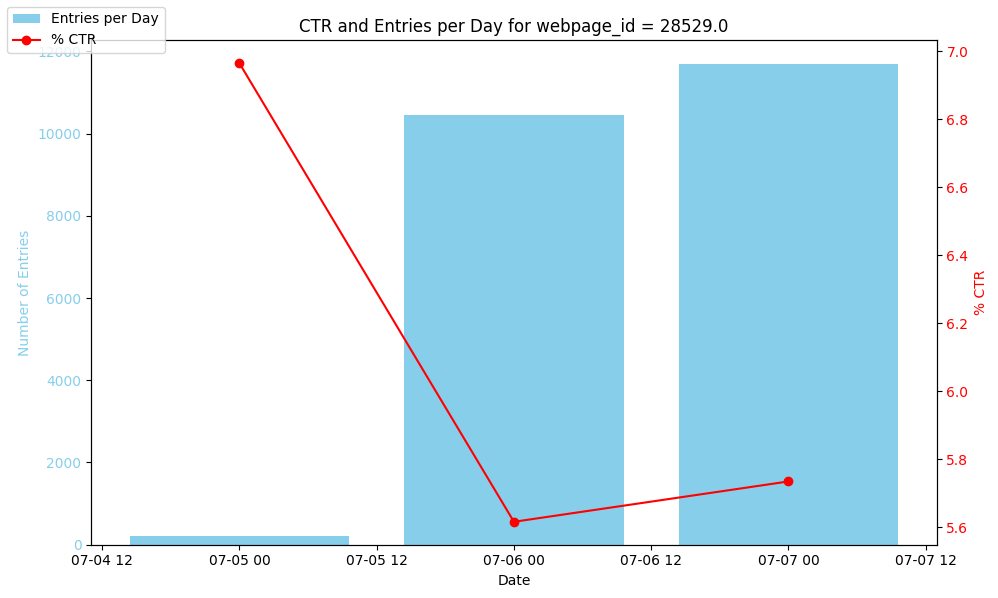

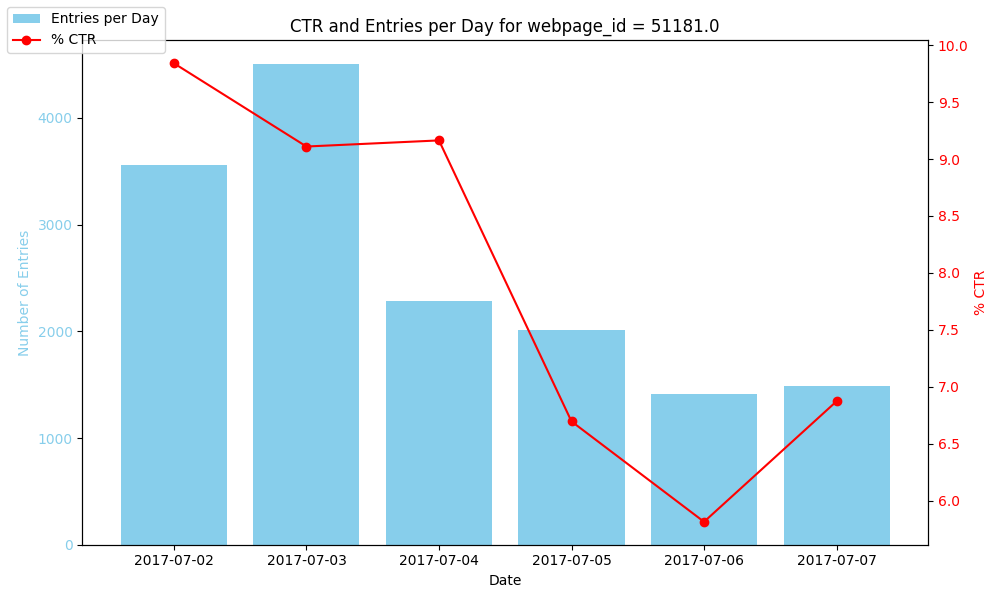

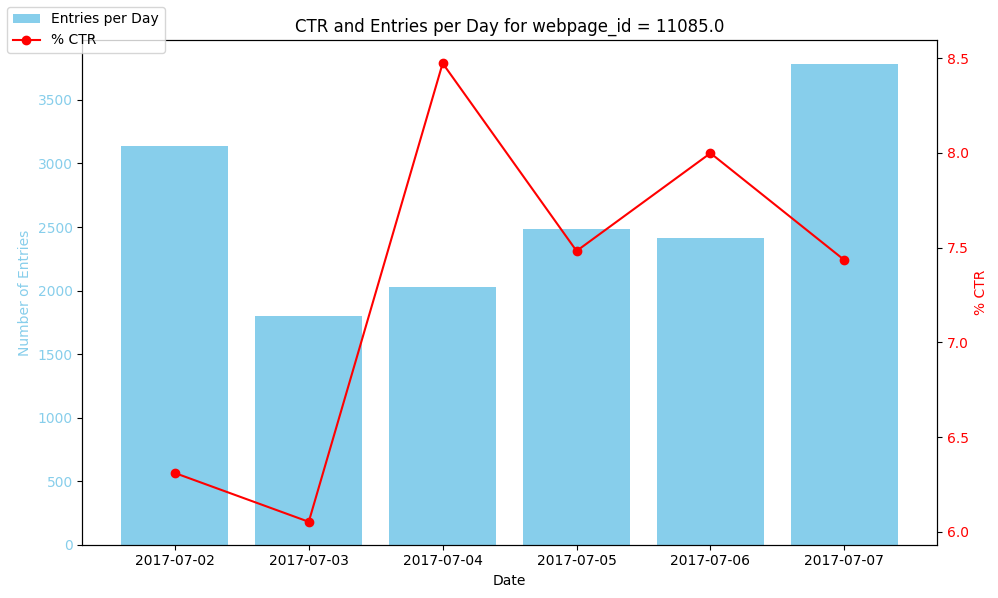

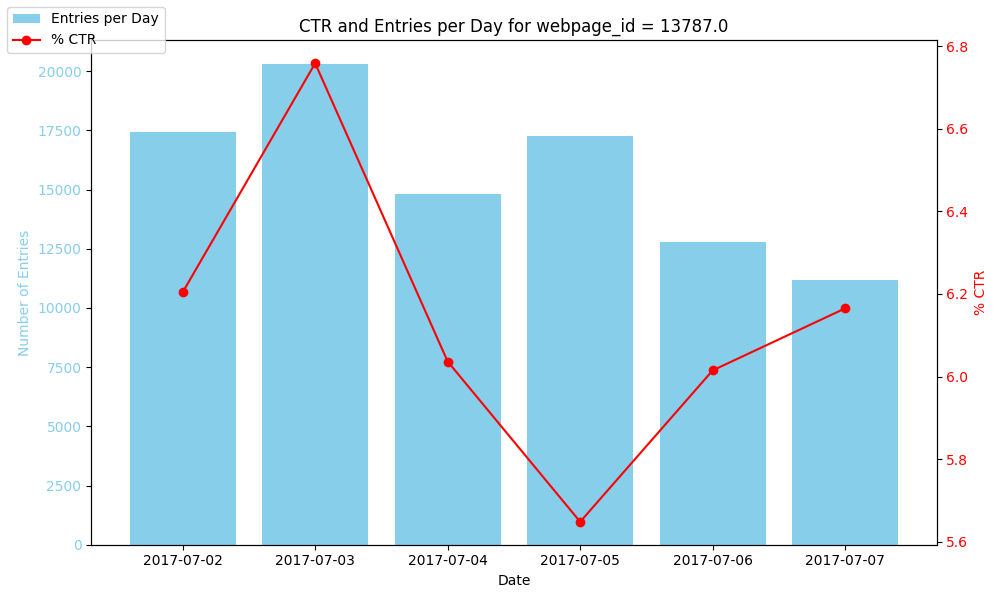

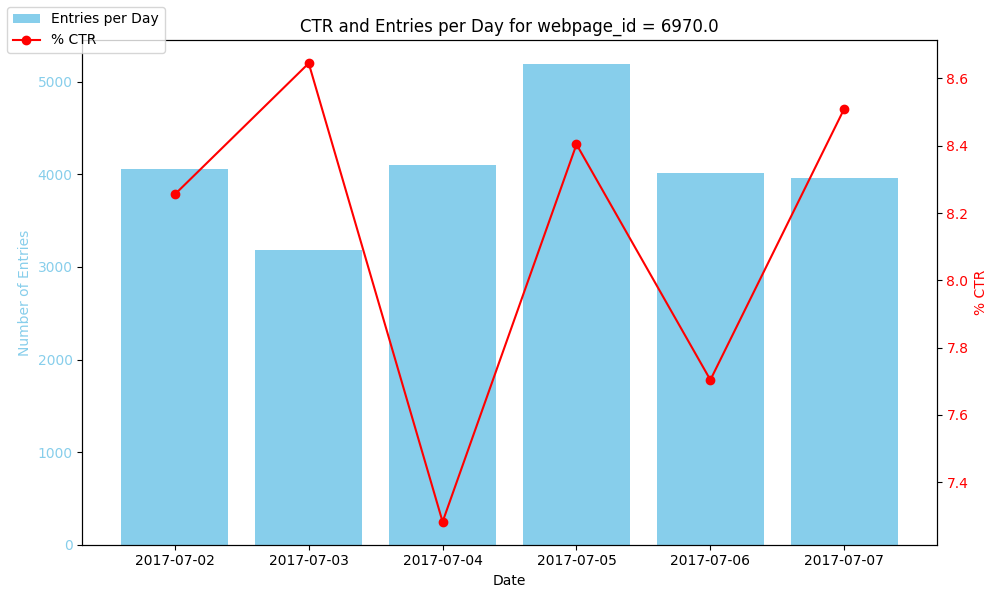

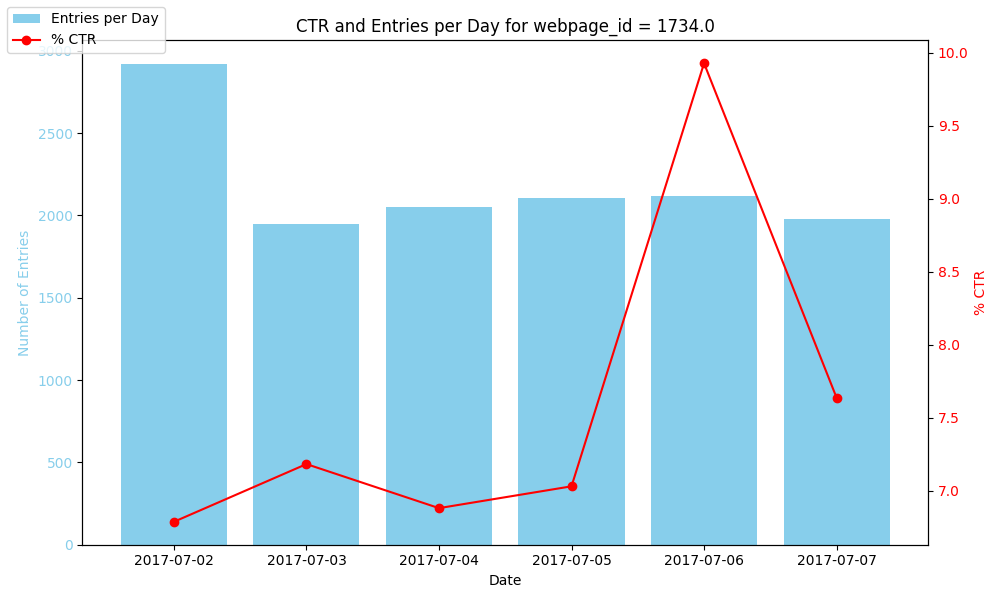

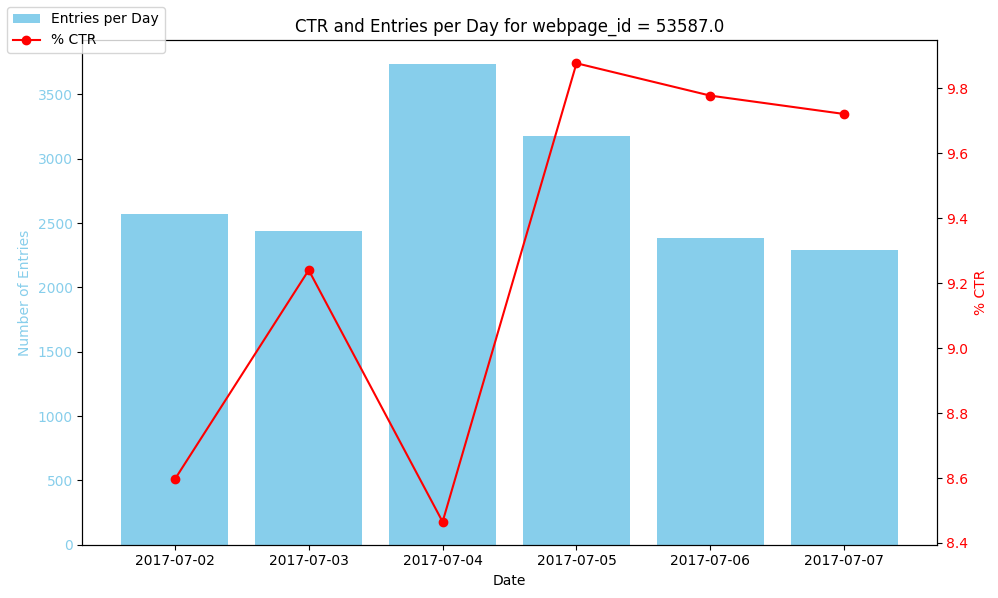

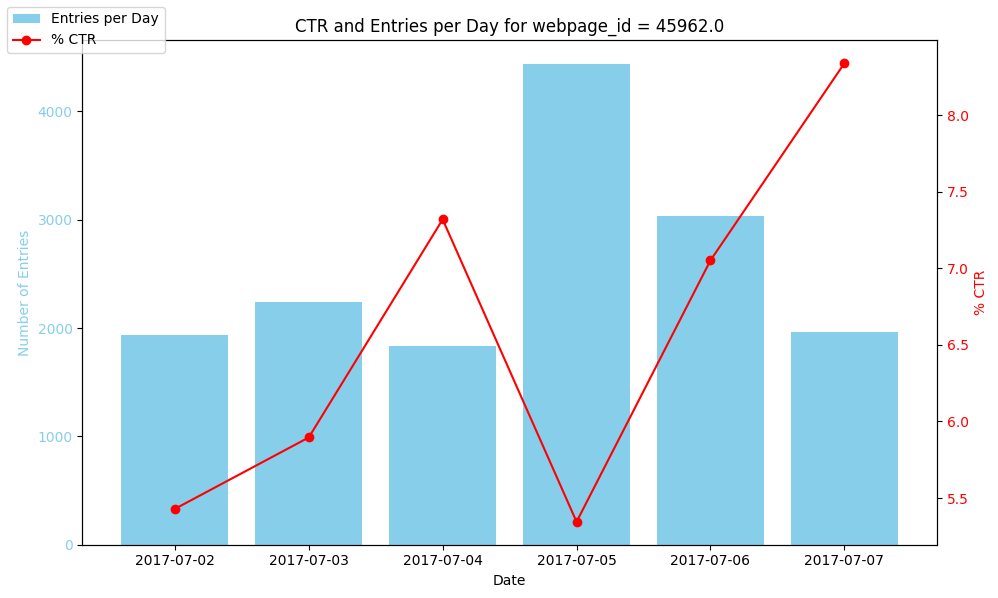

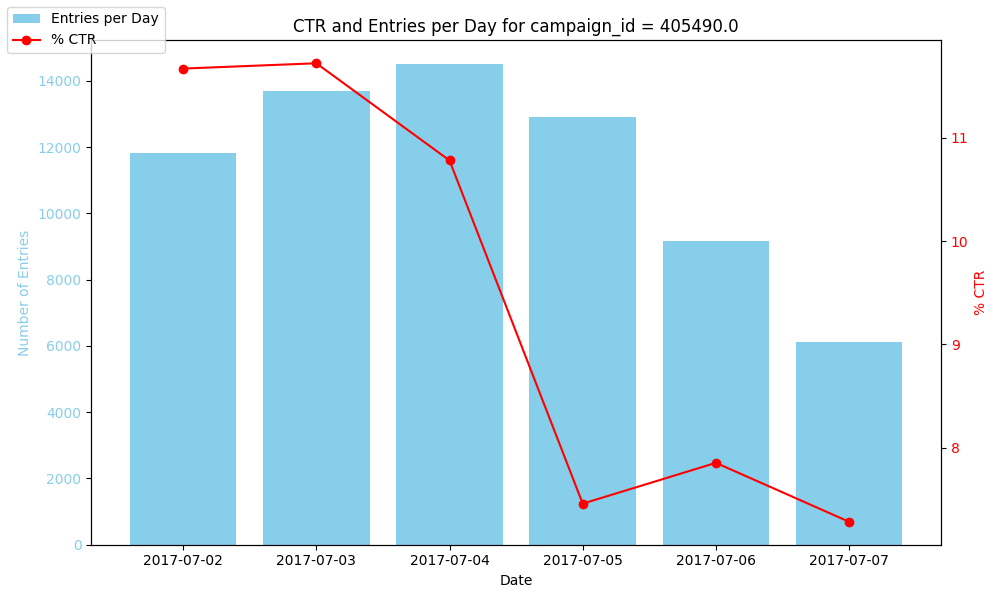

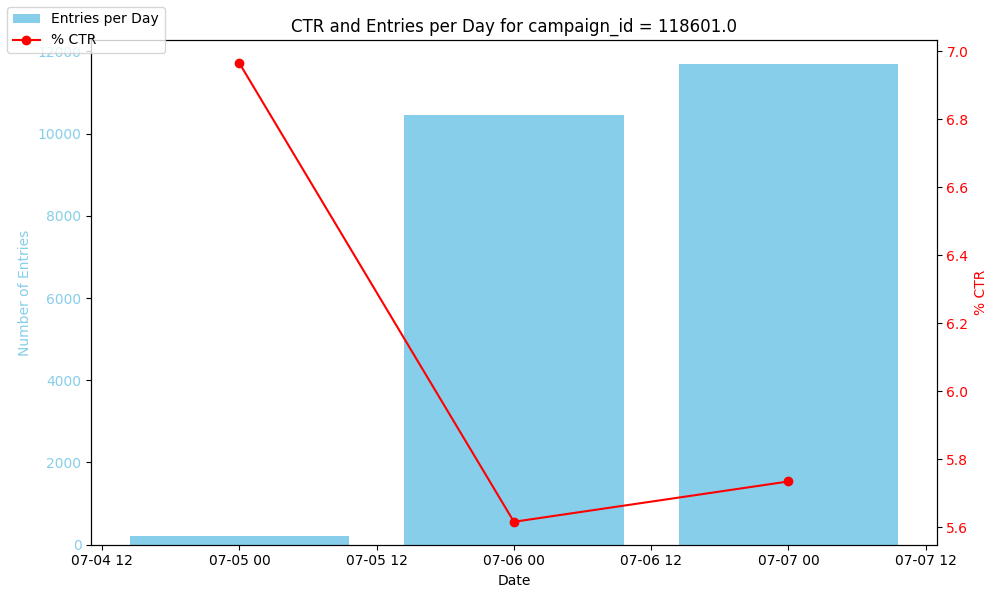

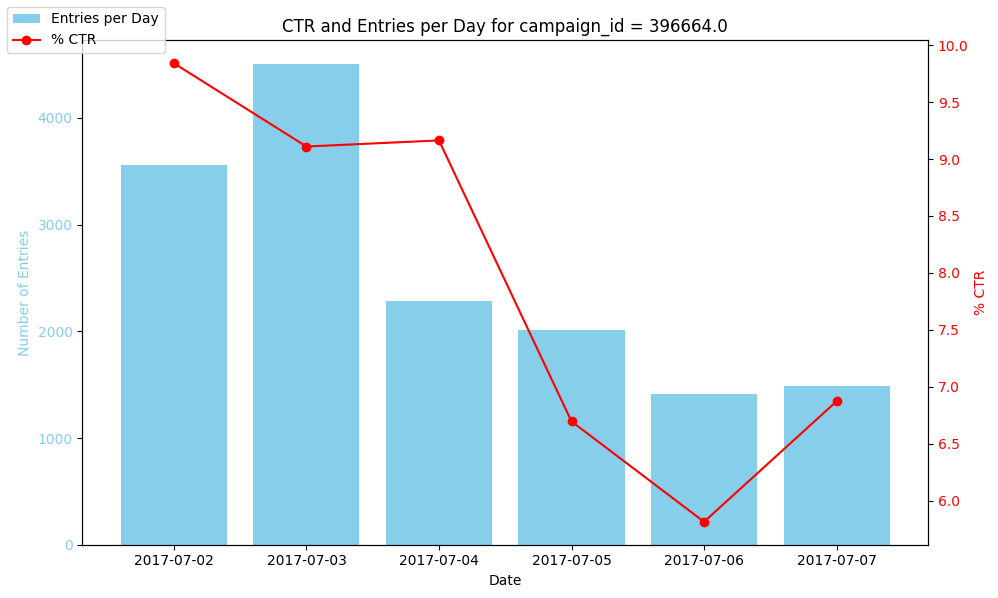

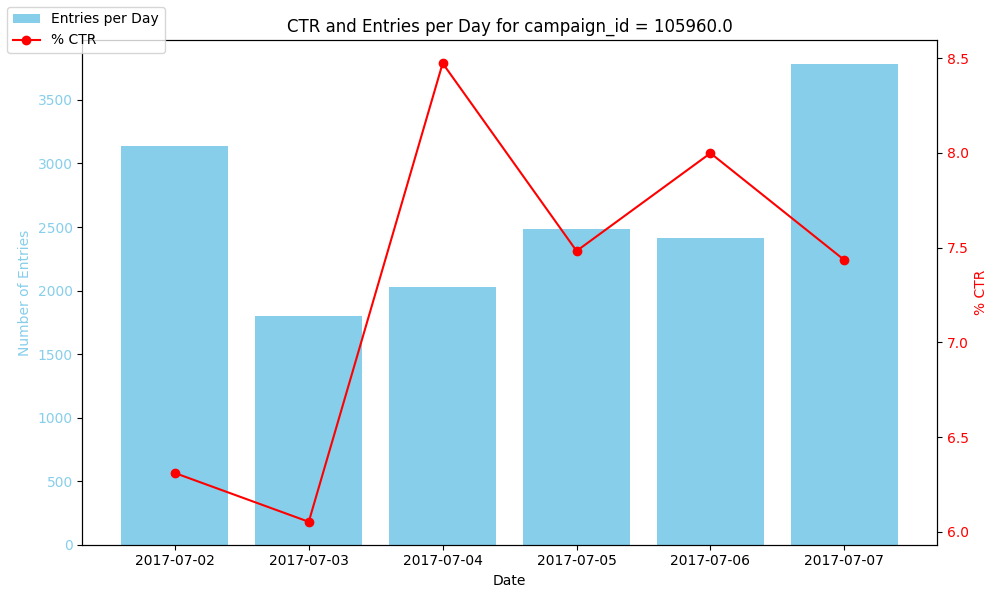

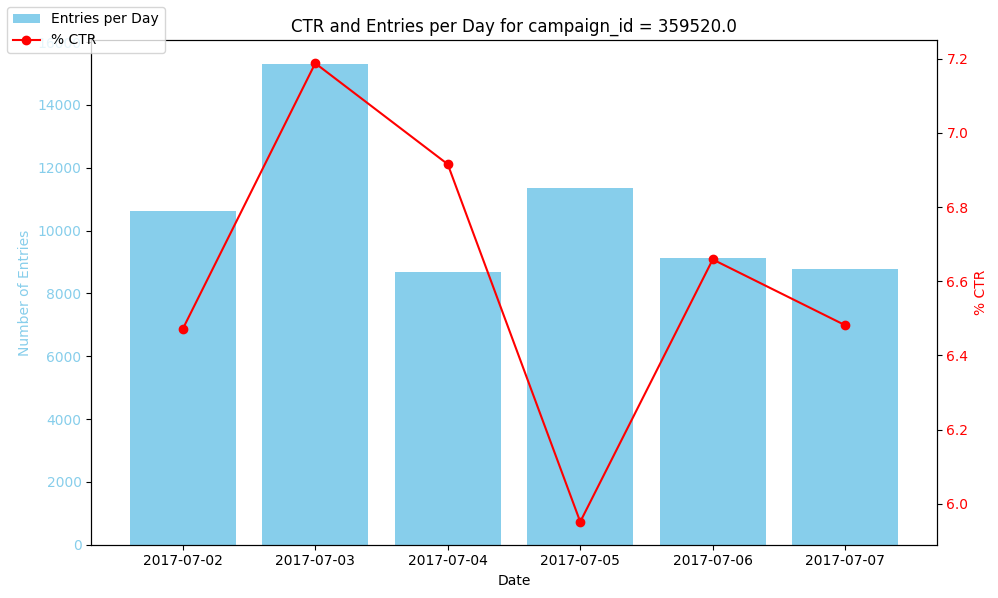

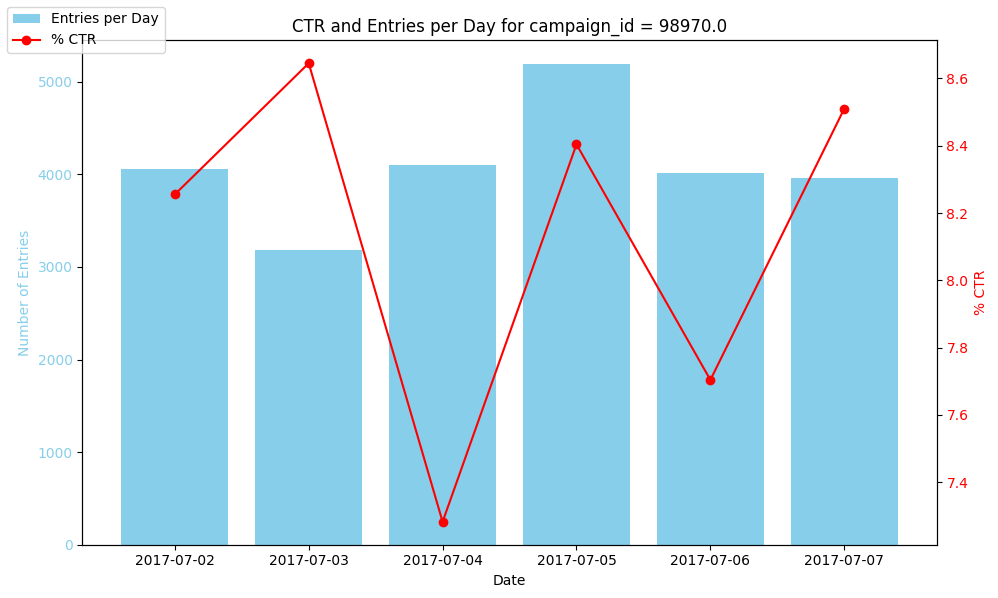

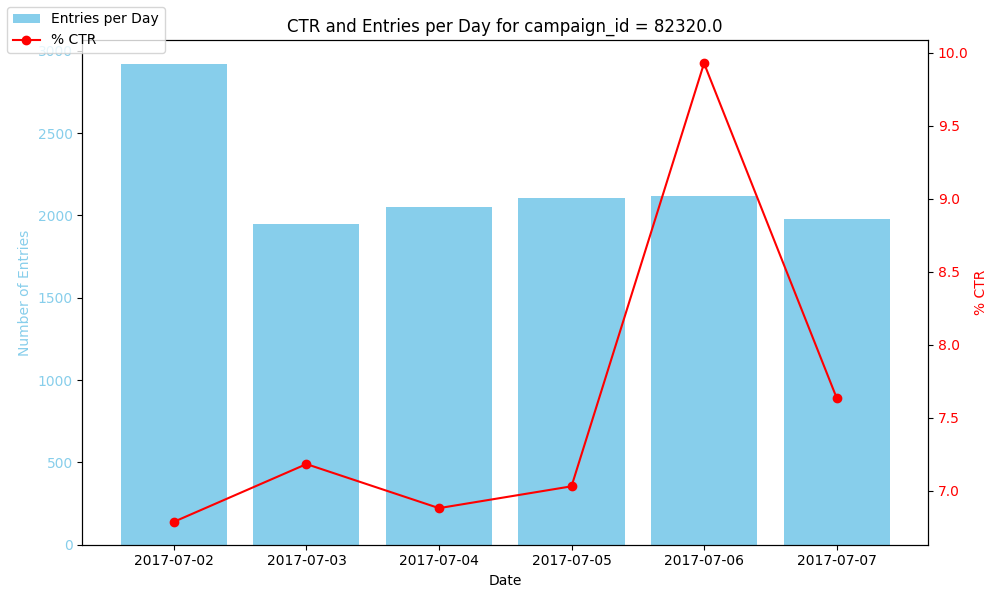

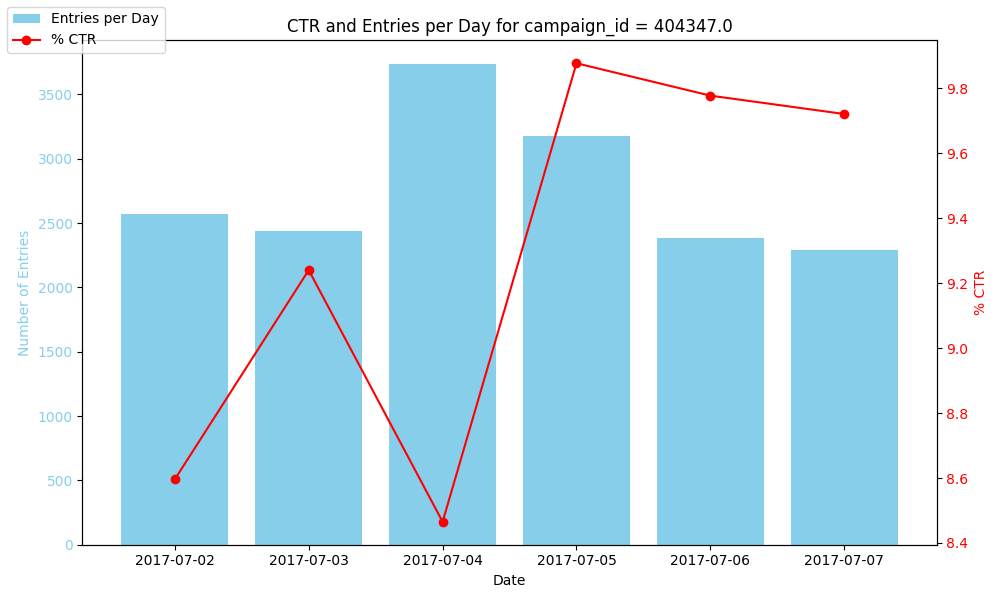

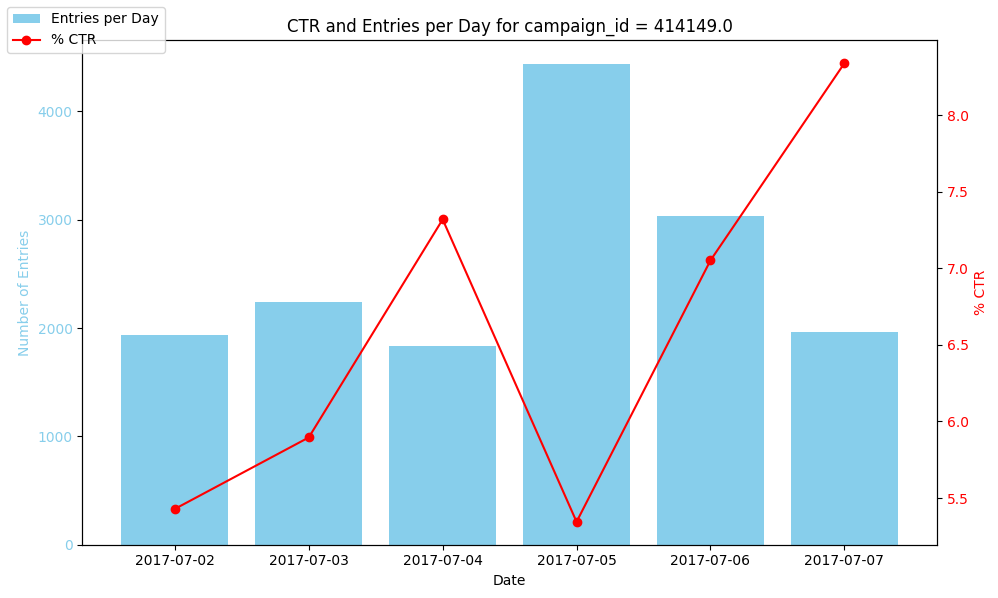

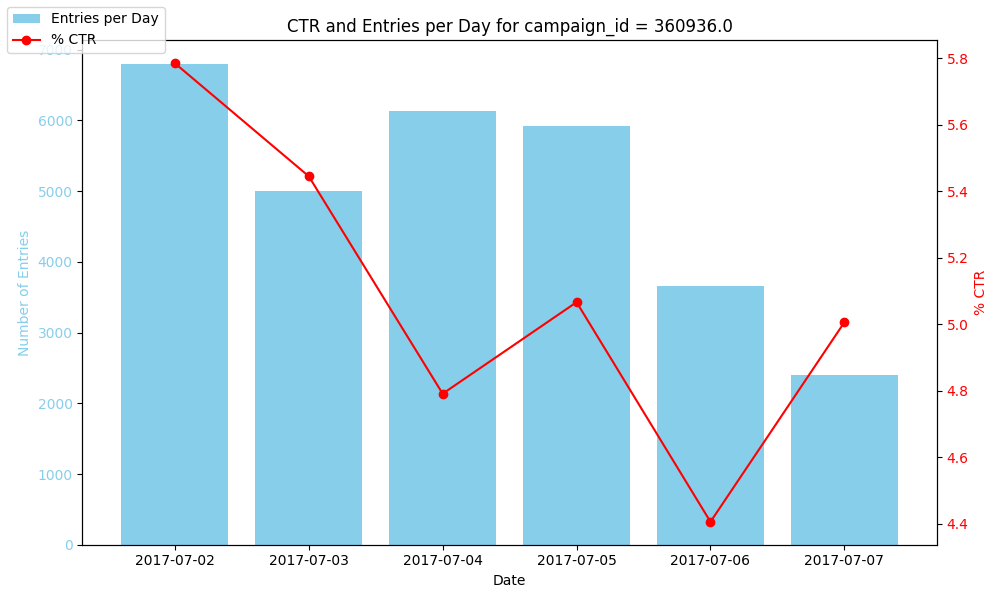

In [24]:
# prompt: Plot number of entries per day and % of ctr in that day. In a bar. Now do it separately for each webpage_id value. Finally for campaign_id

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has 'DateTime', 'ctr', 'webpage_id', and 'campaign_id' columns
# and 'DateTime' is a datetime object

# Convert 'DateTime' to datetime if it's not already
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract the date part
df['Date'] = df['DateTime'].dt.date

# Function to plot CTR per day and % CTR for a specific ID
def plot_ctr_by_date(df, id_column, id_value):
    subset = df[df[id_column] == id_value]
    daily_ctr = subset.groupby('Date')['ctr'].agg(['sum', 'count'])
    daily_ctr['percentage'] = (daily_ctr['sum'] / daily_ctr['count']) * 100

    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax1.bar(daily_ctr.index, daily_ctr['count'], label="Entries per Day", color="skyblue")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Number of Entries", color="skyblue")
    ax1.tick_params(axis='y', labelcolor="skyblue")

    ax2 = ax1.twinx()
    ax2.plot(daily_ctr.index, daily_ctr['percentage'], label="% CTR", color="red", marker='o')
    ax2.set_ylabel("% CTR", color="red")
    ax2.tick_params(axis='y', labelcolor="red")

    plt.title(f"CTR and Entries per Day for {id_column} = {id_value}")
    fig.legend(loc="upper left")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot for each unique webpage_id
for webpage_id in df['webpage_id'].unique():
    plot_ctr_by_date(df, 'webpage_id', webpage_id)

# Plot for each unique campaign_id
for campaign_id in df['campaign_id'].unique():
    plot_ctr_by_date(df, 'campaign_id', campaign_id)

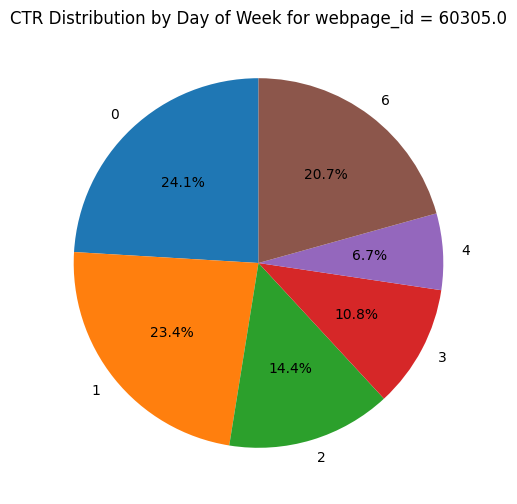

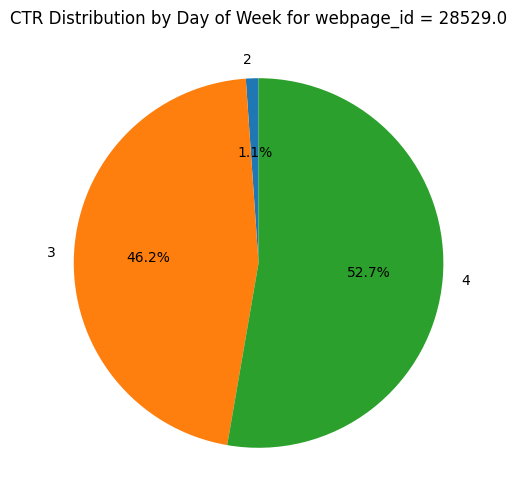

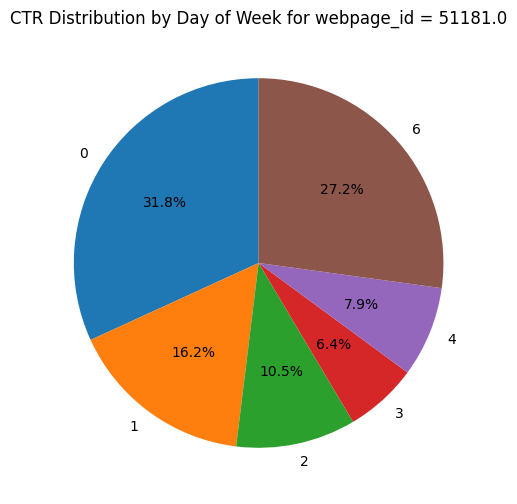

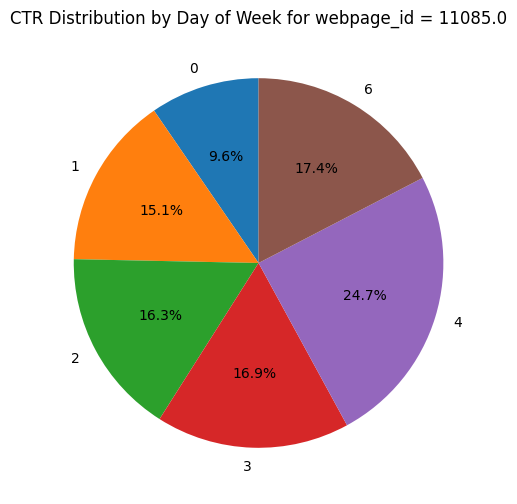

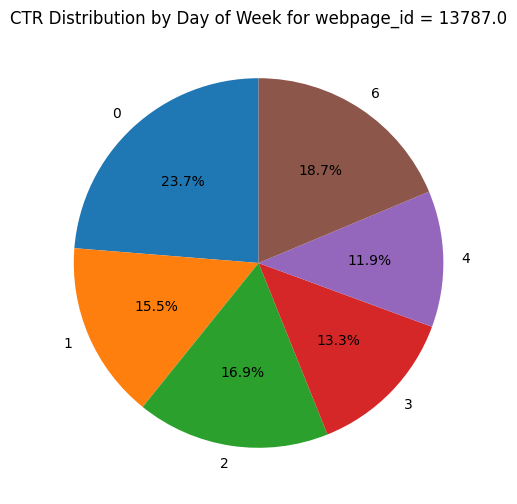

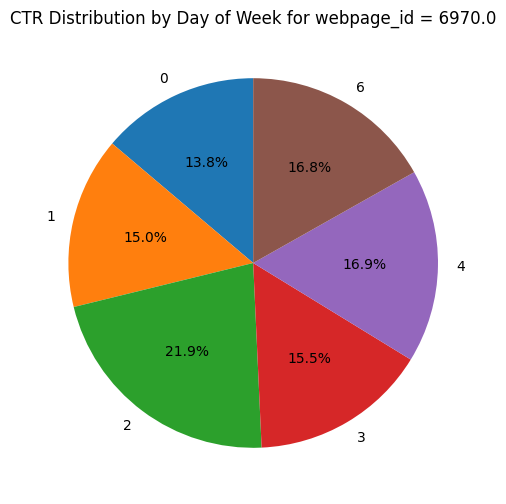

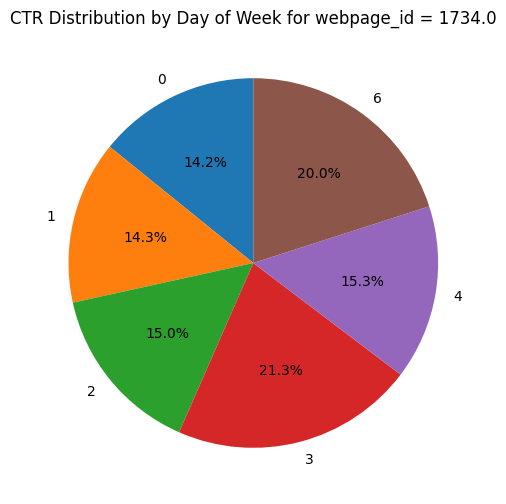

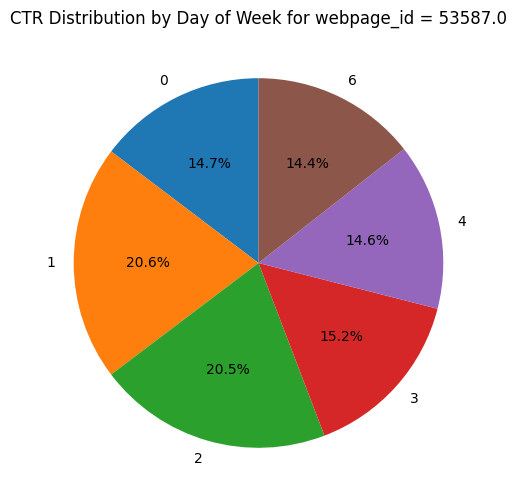

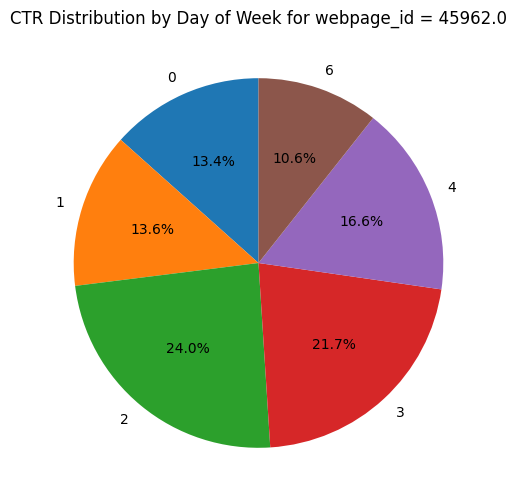

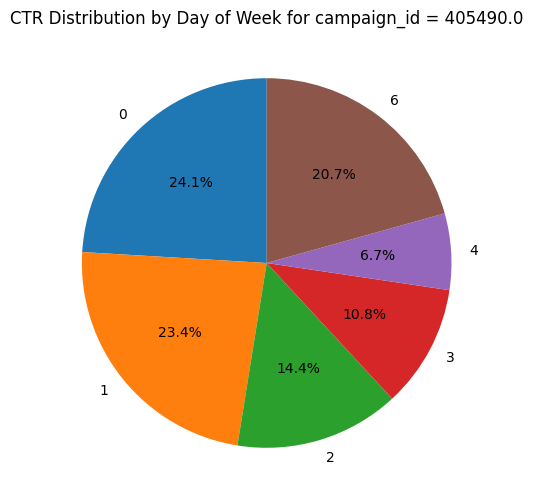

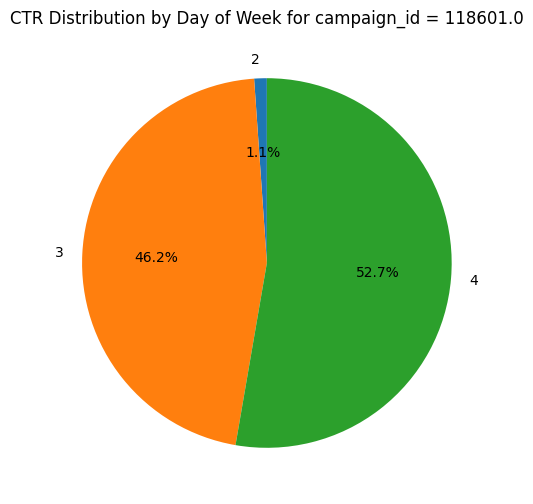

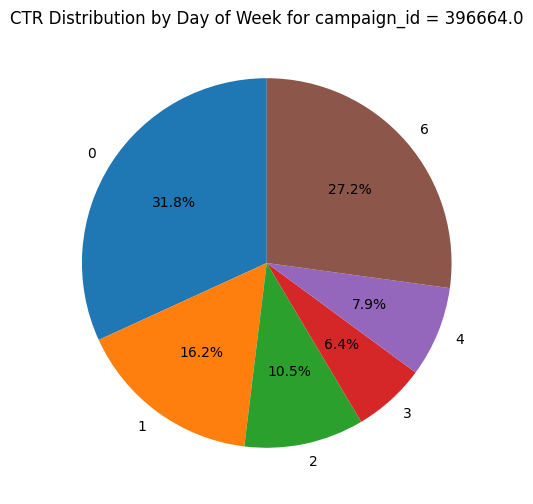

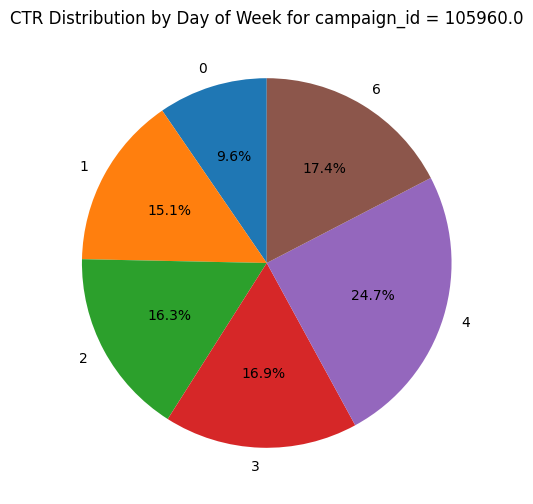

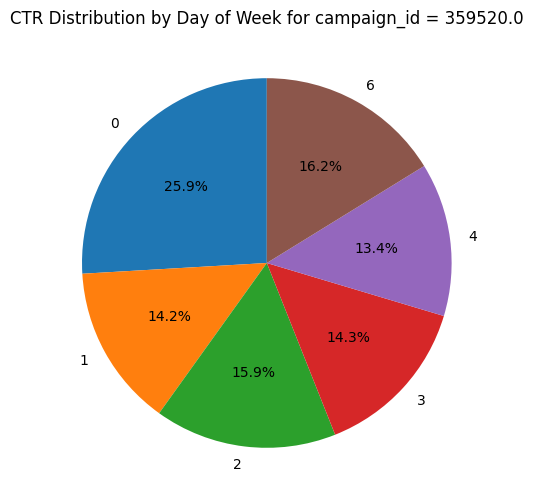

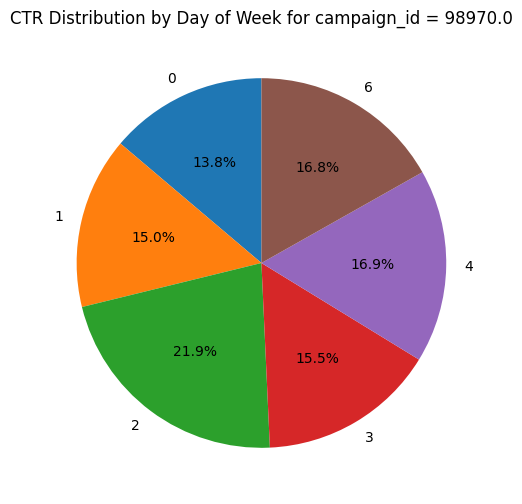

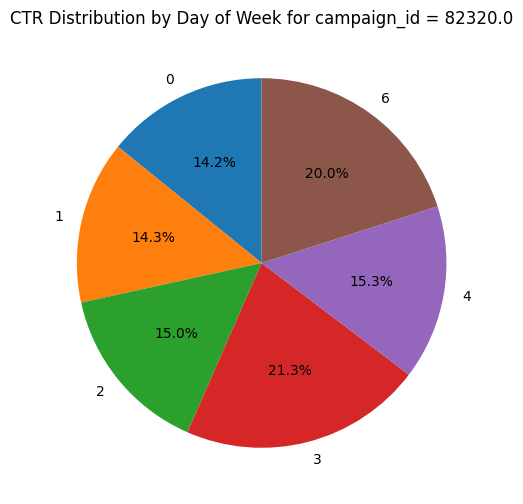

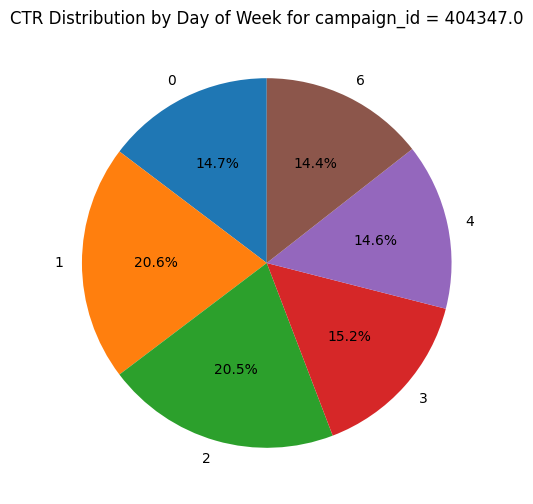

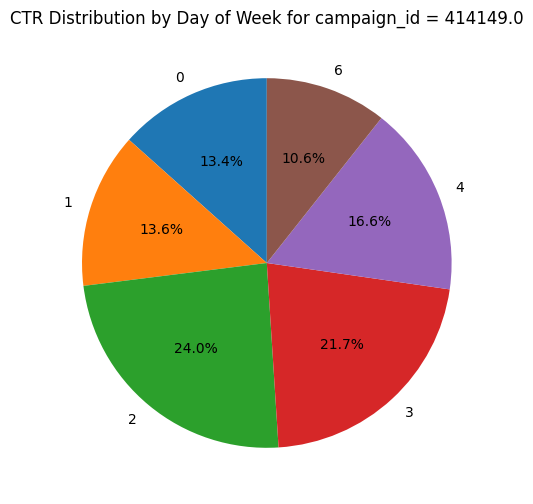

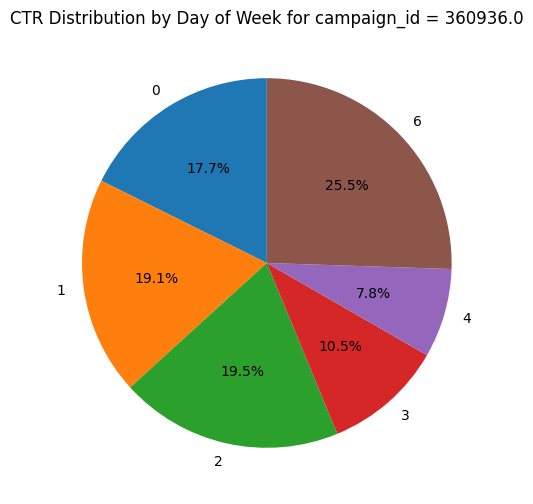

In [25]:
# prompt: For each webpage id do a pie plot of how CTR is distributed across different days of the week. Then same for campaign_id

import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df' and has columns 'webpage_id', 'campaign_id', 'ctr', and 'DateTime'

# Convert 'DateTime' to datetime objects if it's not already
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract the day of the week (0 = Monday, 6 = Sunday)
df['DayOfWeek'] = df['DateTime'].dt.dayofweek

# Function to create pie plots for CTR distribution by day of the week
def plot_ctr_distribution(df, group_col):
    for group_value in df[group_col].unique():
        group_df = df[df[group_col] == group_value]
        ctr_by_day = group_df.groupby('DayOfWeek')['ctr'].sum()

        # Create the pie chart
        plt.figure(figsize=(8, 6))
        plt.pie(ctr_by_day, labels=ctr_by_day.index, autopct='%1.1f%%', startangle=90)
        plt.title(f'CTR Distribution by Day of Week for {group_col} = {group_value}')
        plt.show()

# Plot for webpage_id
plot_ctr_distribution(df, 'webpage_id')

# Plot for campaign_id
plot_ctr_distribution(df, 'campaign_id')

In [26]:
# prompt: Check correlation of var_1 with age_level

# Calculate the correlation between 'var_1' and 'age_level'
correlation = df['var_1'].corr(df['age_level'])

print(f"The correlation between var_1 and age_level is: {correlation}")

The correlation between var_1 and age_level is: 0.11447025111401041


In [28]:
# prompt: Each user has multiple session_id's. Sort them by date. For users with exactly two sessions, see if the probability of is_click on 2nd session is higher, given that there was is_click on first session. Compare to probability of is_click on 2nd session if there was no click on first session (again for users with exactly 2 sessions)

# Sort sessions by date
df['DateTime'] = pd.to_datetime(df['DateTime'])
df = df.sort_values(['user_id', 'DateTime'])

# Analyze users with exactly two sessions
users_two_sessions = df.groupby('user_id').size()[df.groupby('user_id').size() == 2].index
df_two_sessions = df[df['user_id'].isin(users_two_sessions)]

# Calculate probabilities
prob_click_second_given_first_click = df_two_sessions.groupby('user_id').apply(
    lambda x: x.iloc[1]['ctr'] if x.iloc[0]['ctr'] == 1 else None
).dropna().mean()

prob_click_second_given_first_no_click = df_two_sessions.groupby('user_id').apply(
    lambda x: x.iloc[1]['ctr'] if x.iloc[0]['ctr'] == 0 else None
).dropna().mean()


print(f"Probability of click on 2nd session given click on 1st session: {prob_click_second_given_first_click:.4f}")
print(f"Probability of click on 2nd session given no click on 1st session: {prob_click_second_given_first_no_click:.4f}")

<ipython-input-28-b70f2ba20249>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  prob_click_second_given_first_click = df_two_sessions.groupby('user_id').apply(


Probability of click on 2nd session given click on 1st session: 0.2183
Probability of click on 2nd session given no click on 1st session: 0.0600


<ipython-input-28-b70f2ba20249>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  prob_click_second_given_first_no_click = df_two_sessions.groupby('user_id').apply(
